<a href="https://colab.research.google.com/github/michaufsc/dengue1-4/blob/main/dengueprotein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[Parte 1] Baixar Dados de Bioatividade

Referência:
Chanin Nantasenamat
'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

Na Parte 1, realizaremos a coleta e pré-processamento de dados do Banco de Dados do ChEMBL.

Instale o pacote de serviços web chEMBL para que possamos recuperar dados de bioatividade do Banco de Dados ChEMBL.

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 596 kB 10.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

###Busca por proteinas alvo


Dengue virus non-structural protein 1: a pathogenic factor, therapeutic target, and vaccine candidate DOI: https://jbiomedsci.biomedcentral.com/articles/10.1186/s12929-018-0462-0

Selecione e recupere dados de bioatividade para non structural protein (6)

In [ ]:
target = new_client.target
target_query = target.search('dengue virus')
targets = pd.DataFrame.from_dict(target_query)
targets


NameError: ignored

In [ ]:
selected_target = targets.target_chembl_id[6]

selected_target

'CHEMBL4295629'

Aqui, recuperaremos apenas dados de bioatividade para non structural protein l (CHEMBL4295629) que são relatados como valores pChEMBL.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,None,19235370,[],CHEMBL4398329,Inhibition of N-terminal His6-tagged DENV3 NS5...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.5
61,None,19235375,[],CHEMBL4398333,Inhibition of DENV2 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
62,None,19235376,[],CHEMBL4398334,Inhibition of DENV3 2'-O-methyltransferase usi...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,21.0,2.3
63,None,19440635,[],CHEMBL4431573,Inhibition of Dengue virus ribose 2'-O methylt...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.041


Finalmente, salvaremos os dados de bioatividade resultantes em um arquivo CSV bioactivity_data.csv.

In [ ]:
df.to_csv('dengueprotein_01_bioactivity_data_raw.csv', index=False)

NameError: ignored

###Manipulação de dados perdidos
Se algum composto tiver valor faltado para o standard_value e canonical_smiles coluna, então solte-o.

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

NameError: ignored

In [ ]:
len(df2.canonical_smiles.unique())

NameError: ignored

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

###Pré-processamento de dados dos dados de bioatividade

Combine as 3 colunas (molecule_chembl_id.canonical_smiles,standard_value) e bioactivity_class em um DataFrame

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0
...,...,...,...
59,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0
60,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0
61,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0
63,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0


Saves dataframe to CSV file

In [ ]:
df3.to_csv('dengueprotein_02_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
df4 = pd.read_csv('dengueprotein_02_bioactivity_data_preprocessed.csv')

###Rotulagem de compostos como sendo ativos, inativos ou intermediários
Os dados de bioatividade estão na unidade IC50. Compostos com valores inferiores a 1000 nM serão considerados ativos, enquanto aqueles maiores que 10.000 nM serão considerados inativos. Quanto a esses valores entre 1.000 e 10.000 nM serão referidos como intermediários.

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate
...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0,intermediate
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0,intermediate
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0,intermediate
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0,active


In [ ]:
df5.to_csv('dengueprotein_03_bioactivity_data_curated.csv', index=False) 

In [ ]:
! zip dengueprotein.zip *.csv

updating: dengueprotein_01_bioactivity_data_raw.csv (deflated 88%)
updating: dengueprotein_02_bioactivity_data_preprocessed.csv (deflated 77%)
updating: dengueprotein_03_bioactivity_data_curated.csv (deflated 79%)


In [ ]:
! ls -l

total 166200
-rw-r--r-- 1 root root    39327 Jul  7 23:39 dengueprotein_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root     5479 Jul  7 23:40 dengueprotein_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root     6107 Jul  7 23:40 dengueprotein_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root     7760 Jul  7 23:40 dengueprotein.zip
drwx------ 5 root root     4096 Jul  7 22:22 drive
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
drwxr-xr-x 1 root root     4096 Jul  6 13:22 sample_data


###**Parte 2 ánalise de dados exploratórios:**

Na Parte 2, realizaremos o Cálculo de Descritores e Análise de Dados Exploratórios.


###Install conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-07-07 23:40:40--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   309MB/s    in 0.3s    

2022-07-07 23:40:41 (309 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]



Carregar dados de bioatividade

In [ ]:
! wget /content/dengueprotein_03_bioactivity_data_curated.csv

/content/dengueprotein_03_bioactivity_data_curated.csv: Scheme missing.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dengueprotein_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate
...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.0,intermediate
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.0,intermediate
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.0,intermediate
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')


In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4126343,340.0,active,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...
1,CHEMBL3417270,360.0,active,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...
2,CHEMBL521487,5000.0,intermediate,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...
3,CHEMBL4127092,1600.0,intermediate,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...
4,CHEMBL4127819,2000.0,intermediate,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...
...,...,...,...,...
57,CHEMBL269277,1700.0,intermediate,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...
58,CHEMBL4526128,1500.0,intermediate,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...
59,CHEMBL1418094,2300.0,intermediate,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...
60,CHEMBL1214186,41.0,active,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


###**Calcular descritores lipinski**
A regra de cinco de Lipinski, também conhecida como regra da Pfizer de cinco ou simplesmente a regra de cinco (RO5), é uma regra de ouro para avaliar a fármaco ou determinar se um composto químico com uma determinada atividade farmacológica ou biológica tem propriedades químicas e propriedades físicas que a tornariam uma droga provavelmente ativa em humanos. A regra foi formulada por Christopher A. Lipinski em 1997, com base na observação de que a maioria das drogas administradas oralmente são moléculas relativamente pequenas e moderadamente lipofílicas. [

A regra de Lipinski estabelece que, em geral, uma droga por viação não tem mais do que uma violação dos seguintes critérios:[9]

Não mais do que 5 doadores de títulos de hidrogênio (o número total de ligações nitrogênio-hidrogênio e oxigênio-hidrogênio)

Não mais do que 10 aceitadores de ligação de hidrogênio (todos os átomos de nitrogênio ou oxigênio)

Uma massa molecular menor que 500 daltons

Um coeficiente de partição de água octanol[10] (log P) que não excede 5
Observe que todos os números são múltiplos de cinco, que é a origem do nome da regra.

calcular descritores

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

NameError: ignored

Combinar DataFrames
Vamos dar uma olhada nos 2 DataFrames que serão combinados.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,531.20,-1.13,7.00,14.00
1,524.17,-1.57,7.00,14.00
2,498.17,-2.11,7.00,12.00
3,508.16,-2.50,7.00,12.00
4,522.19,-2.11,7.00,12.00
...,...,...,...,...
57,456.71,7.09,2.00,2.00
58,582.68,6.02,3.00,7.00
59,500.51,3.13,6.00,9.00
60,381.39,-2.06,6.00,11.00


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.00,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.00,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.00,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.00,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.00,intermediate
...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.00,intermediate
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.00,intermediate
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.00,intermediate
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.00,active


Agora, vamos combinar os 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.00,active,531.20,-1.13,7.00,14.00
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.00,active,524.17,-1.57,7.00,14.00
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.00,intermediate,498.17,-2.11,7.00,12.00
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.00,intermediate,508.16,-2.50,7.00,12.00
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.00,intermediate,522.19,-2.11,7.00,12.00
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,1700.00,intermediate,456.71,7.09,2.00,2.00
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,1500.00,intermediate,582.68,6.02,3.00,7.00
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,2300.00,intermediate,500.51,3.13,6.00,9.00
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,41.00,active,381.39,-2.06,6.00,11.00


###Converter IC50 para pIC50
Para permitir que os dados do IC50 sejam distribuídos de forma mais uniforme, converteremos o IC50 na escala logarítmica negativa que é essencialmente -log10(IC50).

Esta função personalizada pIC50() aceitará um DataFrame como entrada e irá:
pegar os valores IC50 da coluna standard_value e converter de nM para M multiplicando o valor por 10^-9.
Pegar o valor molar e aplicar -log10
Exclui a coluna standard_value e criar uma nova coluna pIC50

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

nota: Valores superiores a 100.000.000 serão fixados em 100.000.000 caso contrário o valor logarítmico negativo se tornará negativo.

In [ ]:
df_combined.standard_value.describe()

count       62.00
mean     94504.79
std     146546.90
min         16.00
25%       2650.00
50%      14950.00
75%     135500.00
max     452000.00
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Primeiro aplicaremos a função norm_value() para que os valores na coluna standard_value sejam normalizados.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.20,-1.13,7.00,14.00,340.00
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.17,-1.57,7.00,14.00,360.00
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.17,-2.11,7.00,12.00,5000.00
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.16,-2.50,7.00,12.00,1600.00
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.19,-2.11,7.00,12.00,2000.00
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.71,7.09,2.00,2.00,1700.00
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.68,6.02,3.00,7.00,1500.00
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.51,3.13,6.00,9.00,2300.00
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.39,-2.06,6.00,11.00,41.00


In [ ]:
df_norm.standard_value_norm.describe()

count       62.00
mean     94504.79
std     146546.90
min         16.00
25%       2650.00
50%      14950.00
75%     135500.00
max     452000.00
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.20,-1.13,7.00,14.00,6.47
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.17,-1.57,7.00,14.00,6.44
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.17,-2.11,7.00,12.00,5.30
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.16,-2.50,7.00,12.00,5.80
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.19,-2.11,7.00,12.00,5.70
...,...,...,...,...,...,...,...,...
57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.71,7.09,2.00,2.00,5.77
58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.68,6.02,3.00,7.00,5.82
59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.51,3.13,6.00,9.00,5.64
60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.39,-2.06,6.00,11.00,7.39


In [ ]:
df_final.pIC50.describe()

count   62.00
mean     4.84
std      1.05
min      3.34
25%      3.87
50%      4.83
75%      5.58
max      7.80
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('dengueprotein_04_bioactivity_data_3class_pIC50.csv')

Remoção da classe de bioatividade 'intermediária'
Aqui, vamos remover a classe intermediária do nosso conjunto de dados.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.20,-1.13,7.00,14.00,6.47
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.17,-1.57,7.00,14.00,6.44
5,CHEMBL486231,C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,inactive,500.16,-1.13,6.00,11.00,4.74
6,CHEMBL4127921,C#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,inactive,510.15,-1.52,6.00,11.00,4.80
7,CHEMBL4129313,CC#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,inactive,524.18,-1.13,6.00,11.00,4.70
9,CHEMBL4125966,C#C[C@@]1(O)[C@H](O)[C@@](F)(COP(=O)(O)OP(=O)(...,active,526.15,-2.20,7.00,12.00,6.19
11,CHEMBL4282493,COc1cc(C)c(C(=O)NS(=O)(=O)c2cccc3cccnc23)cc1-c...,active,492.58,3.74,2.00,7.00,7.80
12,CHEMBL4287909,O=C(OC1=CS(=O)(=O)Nc2ccc(Oc3ccccc3Br)cc21)c1cc...,inactive,472.32,5.15,1.00,5.00,4.51
17,CHEMBL4291731,COc1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=CS(=O)(...,inactive,423.45,4.40,1.00,6.00,4.69
18,CHEMBL4277678,CC(C)(C)c1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=C...,inactive,449.53,5.69,1.00,5.00,4.80


In [ ]:
df_2class.to_csv('dengue_05_bioactivity_data_2class_pIC50.csv')

###Análise exploratória de dados (Análise quimica espacial) via descritores **lipinski** 


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**Gráfico de frequência das 2 classes de bioatividade**

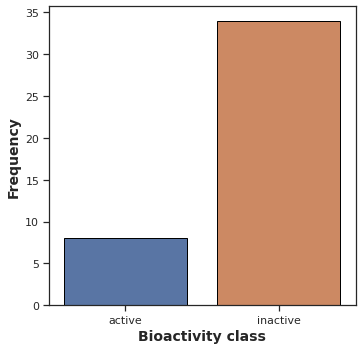

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

##Gráfico de dispersão de MW versus LogP

##Pode-se ver que as 2 classes de bioatividade estão abrangendo espaços químicos semelhantes, como evidente pelo gráfico de dispersão de MW vs LogP.

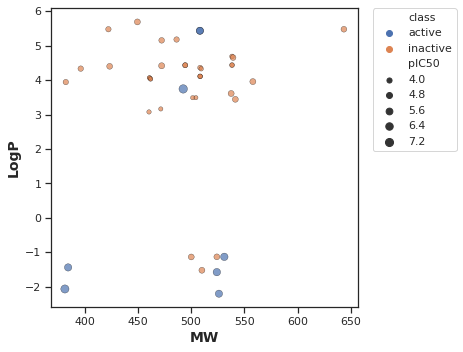

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

###Parcelas de caixa
valor pIC50


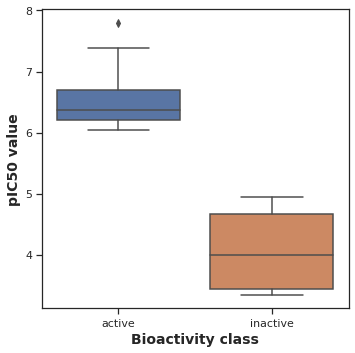

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
#Statistical analysis | Mann-Whitney U Test

#Statistical analysis | Mann-Whitney U Test

Um teste de Mann-Whitney U é considerado uma análise "entre sujeitos". Formalmente, a hipótese nula é que as funções de distribuição de ambas as populações são iguais. A hipótese alternativa é que as funções de distribuição não são iguais. Informalmente, estamos testando para ver se as classificações médias diferem entre os grupos.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.00,0.00,0.05,Different distribution (reject H0)


###MW

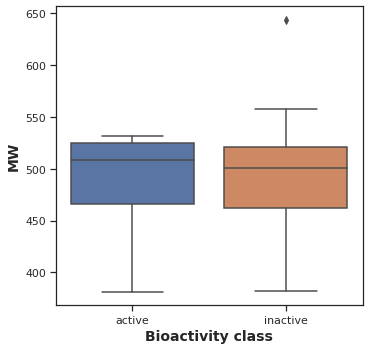

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,130.00,0.43,0.05,Same distribution (fail to reject H0)


###LogP

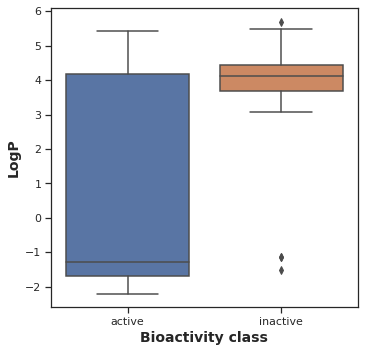

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,74.00,0.02,0.05,Different distribution (reject H0)


NumHDonors

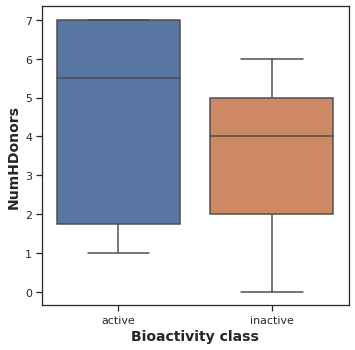

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')


In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,90.50,0.07,0.05,Same distribution (fail to reject H0)


###NumHAcceptors

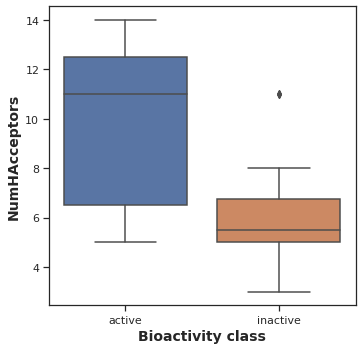

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,57.50,0.00,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 3.pdf
	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 1.pdf
	zip warning: name not matched: drive/MyDrive/botânica econômica/Árvores Brasileiras (Lorenzi) - volume 2.pdf
Scanning files ...................
	zip warning: name not matched: drive/MyDrive/GEABio/[UVAIA] Biblioteca Virtual/BOURDIEU, P. A Dominação Masculina.pdf
	zip warning: name not matched: drive/MyDrive/[UVAIA] Biblioteca Virtual/BOURDIEU, P. A Dominação Masculina.pdf
........  adding: dengueprotein_04_bioactivity_data_3class_pIC50.csv (deflated 73%)
  adding: dengueprotein_02_bioactivity_data_preprocessed.csv (deflated 77%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)


[Parte 3] Preparação de cálculo de descritor e conjunto de dados

Parte 3, estaremos calculando descritores moleculares que são essencialmente descrição quantitativa dos compostos no conjunto de dados. Finalmente, estaremos preparando isso em um conjunto de dados para a construção subsequente do modelo na Parte 4.

In [ ]:
Download PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-07-06 19:45:06--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-07-06 19:45:06--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-07-06 19:45:06 (167 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-07-06 19:45:06--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

Baixe os dados de bioatividade chembl curados que foram pré-processados das Partes 1 e 2 desta série do Projeto Bioinformática. Aqui usaremos o arquivo dengue_bioactivity_data_3class_pIC50.csv que contém essencialmente os valores pIC50 que usaremos para a construção de um modelo de regressão.

In [ ]:
! wget /content/dengueprotein_04_bioactivity_data_3class_pIC50.csv

/content/dengueprotein_04_bioactivity_data_3class_pIC50.csv: Scheme missing.


In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('dengueprotein_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.20,-1.13,7.00,14.00,6.47
1,1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.17,-1.57,7.00,14.00,6.44
2,2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.17,-2.11,7.00,12.00,5.30
3,3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.16,-2.50,7.00,12.00,5.80
4,4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.19,-2.11,7.00,12.00,5.70
...,...,...,...,...,...,...,...,...,...
57,57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.71,7.09,2.00,2.00,5.77
58,58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.68,6.02,3.00,7.00,5.82
59,59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.51,3.13,6.00,9.00,5.64
60,60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.39,-2.06,6.00,11.00,7.39


In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,active,531.20,-1.13,7.00,14.00,6.47
1,1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,active,524.17,-1.57,7.00,14.00,6.44
2,2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,intermediate,498.17,-2.11,7.00,12.00,5.30
3,3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,intermediate,508.16,-2.50,7.00,12.00,5.80
4,4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,intermediate,522.19,-2.11,7.00,12.00,5.70
...,...,...,...,...,...,...,...,...,...
57,57,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,intermediate,456.71,7.09,2.00,2.00,5.77
58,58,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.68,6.02,3.00,7.00,5.82
59,59,CHEMBL1418094,CC1=C(Nc2c(C)cc(O)cc2O)C(=O)C=c2oc3c(c21)C(C)=...,intermediate,500.51,3.13,6.00,9.00,5.64
60,60,CHEMBL1214186,Nc1ncnc2c1ncn2[C@@H]1O[C@H](C[C@@H](N)CC[C@H](...,active,381.39,-2.06,6.00,11.00,7.39


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@H]1O	CHEMBL4126343
[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@@H](n2ccc(N)nc2=O)[C@H](O)[C@@H]1O	CHEMBL3417270
C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL521487
C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127092
CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127819


In [ ]:
! cat molecule.smi | wc -l

62


Calculate fingerprint descriptors
Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL4126343 in molecule.smi (1/62). 
Processing CHEMBL3417270 in molecule.smi (2/62). 
Processing CHEMBL521487 in molecule.smi (3/62). Average speed: 1.83 s/mol.
Processing CHEMBL4127092 in molecule.smi (4/62). Average speed: 0.96 s/mol.
Processing CHEMBL486231 in molecule.smi (6/62). Average speed: 0.74 s/mol.
Processing CHEMBL4127819 in molecule.smi (5/62). Average speed: 0.73 s/mol.
Processing CHEMBL4127921 in molecule.smi (7/62). Average speed: 0.50 s/mol.
Processing CHEMBL4129313 in molecule.smi (8/62). Average speed: 0.44 s/mol.
Processing CHEMBL4127030 in molecule.smi (9/62). Average speed: 0.40 s/mol.
Processing CHEMBL4125966 in molecule.smi (10/62). Average speed: 0.38 s/mol.
Processing CHEMBL4127565 in molecule.smi (11/62). Average speed: 0.34 s/mol.
Processing CHEMBL4282493 in molecule.smi (12/62). Average speed: 0.32 s/mol.
Processing CHEMBL4280007 in molecule.smi (14/62). Average speed: 0.36 s/mol.
Processing CHEMBL4287909 in molecule.smi (13/62). Average spee

In [ ]:
! ls -l

total 108688
-rw-r--r-- 1 root root     6526 Jul  6 19:30 dengue_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root    39327 Jul  6 16:08 dengueprotein_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root     5479 Jul  6 16:12 dengueprotein_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root     6107 Jul  6 17:09 dengueprotein_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root     9710 Jul  6 19:29 dengueprotein_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root     7760 Jul  6 17:12 dengueprotein.zip
-rw-r--r-- 1 root root   121578 Jul  6 19:52 descriptors_output.csv
drwx------ 5 root root     4096 Jul  6 16:03 drive
drwxr-xr-x 3 root root     4096 Jul  6 19:45 __MACOSX
-rw-r--r-- 1 root root      119 Jul  6 19:39 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Jul  6 19:37 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      128 Jul  6 19:42 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      125 Jul  6 19:40 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 

Preparando as Matrizes de Dados X e Y



Matriz de dados X

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3417270,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4126343,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL521487,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4127092,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL486231,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,CHEMBL4526128,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,CHEMBL269277,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,CHEMBL1418094,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,CHEMBL1214186,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3417270,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4126343,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL521487,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4127092,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL486231,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,CHEMBL4526128,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,CHEMBL269277,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,CHEMBL1418094,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,CHEMBL1214186,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Y variable
Convert IC50 to pIC50

In [ ]:

df3_Y = df3['pIC50']
df3_Y

0    6.47
1    6.44
2    5.30
3    5.80
4    5.70
     ... 
57   5.77
58   5.82
59   5.64
60   7.39
61   6.31
Name: pIC50, Length: 62, dtype: float64

Combining X and Y variable

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.47
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.44
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.80
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.77
58,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.82
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.64
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.39


In [ ]:
dataset3.to_csv('dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

Let's download the CSV file to your local computer for the Part 3B (Model Building).

[Part 4] Regression Models with Random Forest



1. Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

2. Load the data set

In [ ]:
! wget /content/dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

/content/dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv: Scheme missing.


In [ ]:
df = pd.read_csv('dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

3.1. Input features

In [ ]:
X = df.drop('pIC50', axis=1)

In [ ]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


3.2. Output features

In [ ]:
Y = df.pIC50
Y

0    6.47
1    6.44
2    5.30
3    5.80
4    5.70
     ... 
57   5.77
58   5.82
59   5.64
60   7.39
61   6.31
Name: pIC50, Length: 62, dtype: float64

3.3. Let's examine the data dimension

In [ ]:
X.shape

(62, 881)

In [ ]:
Y.shape

(62,)


3.4. Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(62, 204)

4. Data split (80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((49, 204), (49,))

In [ ]:
X_test.shape, Y_test.shape

((13, 204), (13,))

5. Building a Regression Model using Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8779514139825212

In [ ]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

NameError: ignored

[Part 5] Comparing Regressors

In Part 5, we will be comparing several ML algorithms for build regression models of dengue inhibitors.

1. Import libraries

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 127.6 MB 26 kB/s 
     |████████████████████████████████| 302 kB 57.3 MB/s 
     |████████████████████████████████| 248 kB 59.0 MB/s 
     |████████████████████████████████| 269 kB 61.3 MB/s 
     |████████████████████████████████| 1.2 MB 63.5 MB/s 
     |████████████████████████████████| 72 kB 806 kB/s 
     |████████████████████████████████| 14.5 MB 5.6 MB/s 
     |████████████████████████████████| 10.1 MB 33.5 MB/s 
     |████████████████████████████████| 6.8 MB 6.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=98af5cc6c987f9ae09de72f5e6320a61ec5d004f3b612a7005eabd13d37cf861
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

ImportError: ignored

In [ ]:
! wget /content/dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

/content/dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv: Scheme missing.


In [ ]:
df = pd.read_csv('dengueprotein_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
# Examine X dimension
X.shape

(62, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(62, 204)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 59857.55it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,7.19,-19.12,4.82,0.02
DummyRegressor,1.31,0.00,1.07,0.04
LassoLars,1.31,0.00,1.07,0.04
Lasso,1.31,0.00,1.07,0.02
ElasticNet,1.19,0.37,0.85,0.02
LassoLarsIC,1.18,0.40,0.83,0.04
LarsCV,1.17,0.45,0.79,0.39
OrthogonalMatchingPursuitCV,1.12,0.62,0.66,0.04
KNeighborsRegressor,1.10,0.67,0.61,0.04


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

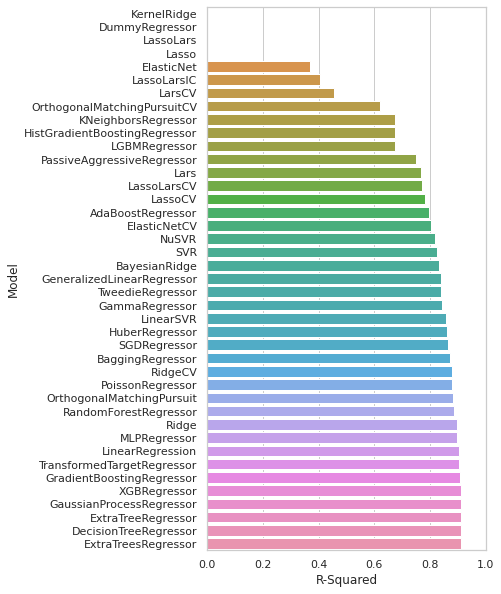

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

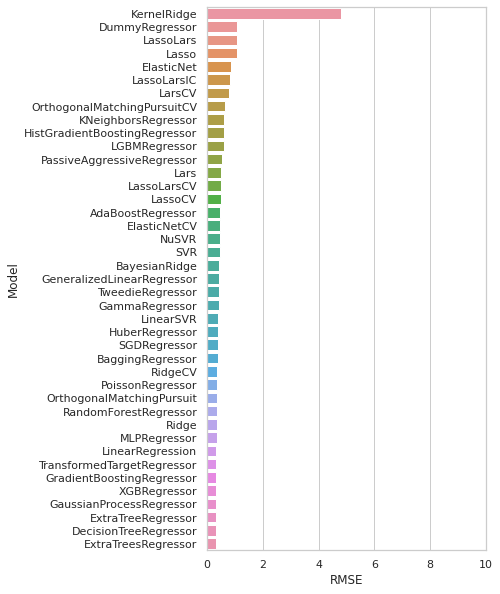

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

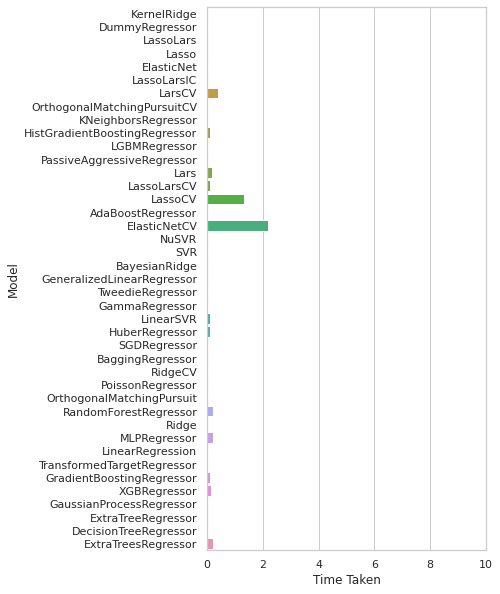

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))